# Market Classification

Analyzing market research for a restaurant with a twofold objective: to gain insight into customer loyalty and to decide on the restaurant’s positioning strategy. 

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
X_train = df_train.iloc[:,1:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,1:-1]
y_test = df_test.iloc[:,-1]

In [4]:
X_train.head()

,Ads,Price,Place,F_Quali,S_Quali,Varie,S_scape,P_Faci,Gifts
0,2,2,2,3,3,2,3,2,2
1,2,2,2,3,3,2,3,2,2
2,2,2,2,3,3,2,3,2,2
3,4,4,4,5,5,4,5,4,4
4,3,3,3,4,4,3,4,3,3


In [5]:
# calculating F-scores
print(' Variable\t  F-score\t    P > F\n', '-'*45)
for iv in list(X_train.columns):
    f_score = stats.f_oneway(X_train[iv][y_train == 1], 
                   X_train[iv][y_train == 2], 
                   X_train[iv][y_train == 3])
    print(' ' + '\t'.join([iv.ljust(7)] + \
                                [("%.4f" % x).rjust(10) for x in [f_score.statistic, f_score.pvalue]]))

 Variable	  F-score	    P > F
 ---------------------------------------------
 Ads    	  225.7171	    0.0000
 Price  	  834.2816	    0.0000
 Place  	  644.2620	    0.0000
 F_Quali	  164.1339	    0.0000
 S_Quali	  257.1569	    0.0000
 Varie  	  419.3651	    0.0000
 S_scape	  171.6483	    0.0000
 P_Faci 	  314.2736	    0.0000
 Gifts  	  314.4948	    0.0000


All of the independent variables in the survey data returned very large F-scores and statistically significant p-values. Because there is a low likelihood of getting a significantly different result for each variable, all of them will be used in classifying customers.  

In [6]:
#verify if there is imbalance in our dataset, not very much
#X_train[:][y_train == 1].count()/X_train[:].count() #20%
#X_train[:][y_train == 2].count()/X_train[:].count() #40%
#X_train[:][y_train == 3].count()/X_train[:].count() #40%

## Linear Discriminant Analysis

In [7]:
#Since all questions are on the same likert scale from 1 to 5, there is no need to scale features

In [8]:
#fit LDA model with X_train and y_train
lda = LDA()
Model_lda = lda.fit(X_train, y_train)
y_pred_lda = Model_lda.predict(X_test)

In [9]:
pd.crosstab(y_test,y_pred_lda)

col_0,1,2,3
Loyalty,,,
1,15,5,0
2,1,37,1
3,0,0,41


In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy ' + str(accuracy_score(y_test, y_pred_lda)))

Accuracy 0.93


This model perfectly predicted all high-loyalty (3) customers and misclassified a few low-loyalty (1) and medium-loyalty (2) customers. It misclassified 5 low-loyalty customers as medium-loyalty and misclassified a medium-loyalty customer in each high- and low- loyalty category. Overall, the LDA model is pretty strong despite the mild inaccuracies on the low-loyalty customers.

## Multinomial Logistic Regression

In [11]:
#fit MLR model with X_train and y_train
lr=LR()
Model_lr = lr.fit(X_train, y_train)
y_pred_lr = Model_lr.predict(X_test)

/Users/jiaqicui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jiaqicui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
pd.crosstab(y_test,y_pred_lr)

col_0,1,2,3
Loyalty,,,
1,17,3,0
2,0,16,23
3,0,0,41


In [13]:
print('Accuracy ' + str(accuracy_score(y_test, y_pred_lr)))

Accuracy 0.74


The accuracy of the multinomial logistic regression model is only 0.74. This model also perfectly predicted all high-loyalty customers but misclassified over half of medium-loyalty customers as high-loyalty customers. Multinomial logistic regression is an over-optimistic model that tends to be inaccurate in-between extremes.

## Decision Tree

In [14]:
dt = DecisionTreeClassifier()
Model_dt = dt.fit(X_train, y_train)
y_pred_dt = Model_dt.predict(X_test)

In [15]:
pd.crosstab(y_test,y_pred_dt)

col_0,1,2,3
Loyalty,,,
1,20,0,0
2,0,39,0
3,0,0,41


In [16]:
print('Accuracy ' + str(accuracy_score(y_test, y_pred_dt)))

Accuracy 1.0


The decision tree is a "perfect" model, as it accurately predicted all of the results into the correct classification. Though the decision tree model returns a perfect fit for the test data and considering the limited amount of survey respondents when compared to the general population, it may not be the most optimal model in practice due to overfitting. 

Interestingly, all three models predicted high-loyalty customers perfectly. This might indicate that there is an apparent distinction in the high-loyalty customer segment. 

## Visualization for LDA

In [29]:
X_lda = lda.fit_transform(X_train, y_train) #vectors 

In [30]:
lda.explained_variance_ratio_

array([0.98497973, 0.01502027])

In [31]:
coef_lda=pd.DataFrame(Model_lda.coef_)
coef_lda.columns = X_train.columns

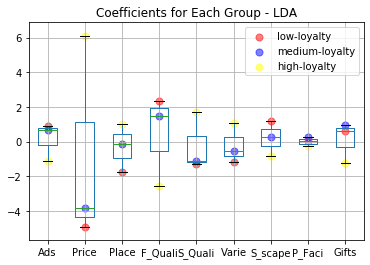

In [40]:
coef_lda.boxplot()
plt.scatter(np.repeat(np.arange(coef_lda.shape[1])+1, 1), coef_lda.values[0], marker='o', alpha=0.5, s=50, c='red', label = 'low-loyalty')
plt.scatter(np.repeat(np.arange(coef_lda.shape[1])+1, 1), coef_lda.values[1], marker='o', alpha=0.5, s=50, c='blue',label = 'medium-loyalty')
plt.scatter(np.repeat(np.arange(coef_lda.shape[1])+1, 1), coef_lda.values[2], marker='o', alpha=0.5, s=50, c='yellow',label = 'high-loyalty')
plt.title('Coefficients for Each Group - LDA')
#plt.xticks(('Ads', 'Price', 'Place', 'F_Quali', 'S_Quali', 'Varie', 'S_scape',
#       'P_Faci', 'Gifts'))
plt.legend(loc="upper right")
plt.show()

In [44]:
mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X_lda[y_train==cl], axis=0))
x=np.array(pd.DataFrame(mean_vectors).iloc[:,0])
y=np.array(pd.DataFrame(mean_vectors).iloc[:,1])

No handles with labels found to put in legend.


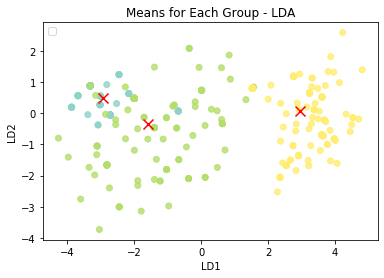

In [47]:
#plot cluster means
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='Set3',
    alpha=0.8
    #edgecolors='b'
)
plt.legend(loc = "upper left")
plt.scatter(x,y,c='red',marker='x',s=100)
plt.title('Means for Each Group - LDA')
plt.show()

## Visulization for MLR

In [49]:
coef_mlr = pd.DataFrame(Model_lr.coef_)

In [50]:
coef_mlr.columns = X_train.columns

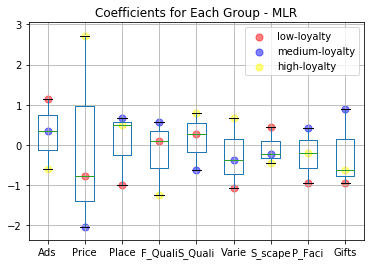

In [51]:
coef_mlr.boxplot()
plt.scatter(np.repeat(np.arange(coef_mlr.shape[1])+1, 1), coef_mlr.values[0], marker='o', alpha=0.5, s=50, c='red', label = "low-loyalty")
plt.scatter(np.repeat(np.arange(coef_mlr.shape[1])+1, 1), coef_mlr.values[1], marker='o', alpha=0.5, s=50, c='blue', label = "medium-loyalty")
plt.scatter(np.repeat(np.arange(coef_mlr.shape[1])+1, 1), coef_mlr.values[2], marker='o', alpha=0.5, s=50, c='yellow', label = "high-loyalty")
plt.title('Coefficients for Each Group - MLR')
#plt.xticks(('Ads', 'Price', 'Place', 'F_Quali', 'S_Quali', 'Varie', 'S_scape',
#       'P_Faci', 'Gifts'))
plt.legend(loc = "upper right")
plt.show()

## Visualization for Decision Tree

In [37]:
#! pip install pydotplus
#! pip install graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


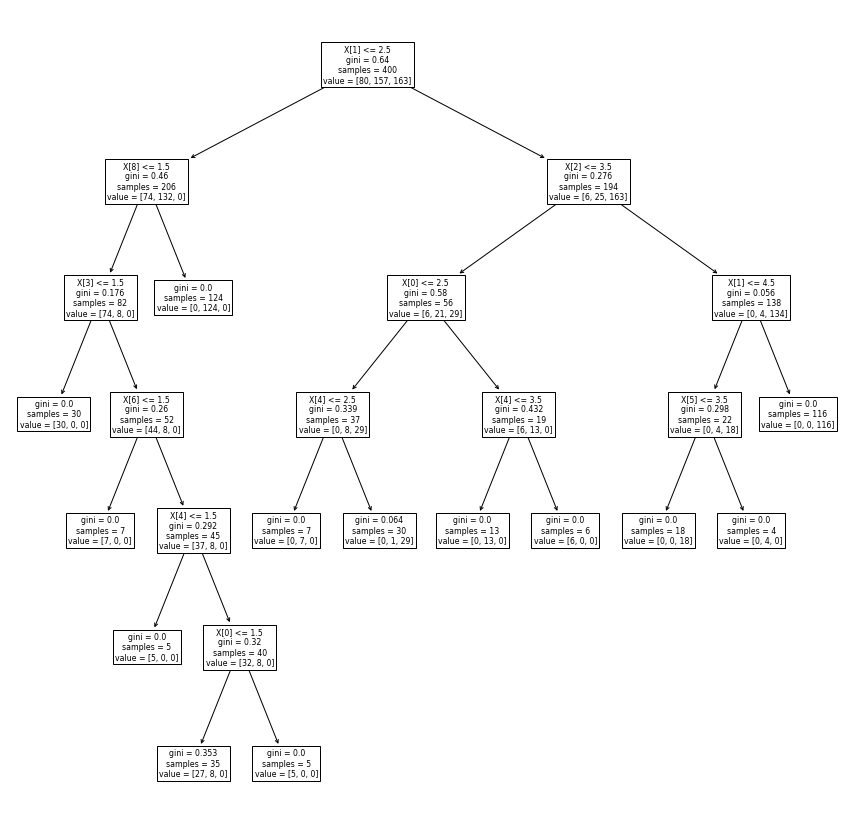

In [39]:
from matplotlib.pyplot import figure
plt.figure(figsize=(15,15))
tree.plot_tree(Model_dt)
plt.show()


